# Predict & Plot LM/Protein Attention Map in 5 Seconds

We can continue using the same API endpoint that provides contact maps, embeddings, and logits from the largest protein language model, ESM2. This time, we can plot the attention map for a sequence, providing a bit of insight into how the NN looks at each residues.

In [1]:
import os, sys
import numpy as np

from matplotlib import pyplot as plt

# Add Python module with utility functions for interacting with BioLM API
repo_root = os.path.join(os.getcwd(), '..', '..')
src_dir = os.path.join(repo_root, 'src')
if src_dir not in sys.path:
    sys.path.append(src_dir)
    
import biolm_util

In [2]:
tokens = biolm_util.get_api_token()  # They should be set as env vars now, so not needed

In [3]:
seq = "KRVPRTGWVYRNVEKPESVSDHMYRMAVMAMVTRDDRLNKDRCIRLALVHDMAECIVGDIAPADNIPKEEKHRREEEAMKQITQLLPEDLRKELYELWEEYETQSSEEAKFVKQLDQCEMILQASEYEDLENKPGRLQDFYDSTAGKFSHPEIVQLVSELETERNASMATASAEPG"

print("Sequence length: {}".format(len(seq)))

Sequence length: 176


Let's make a secure REST API request to BioLM API to quickly make the prediction on GPU.

In [4]:
%%time

seq_transforms = biolm_util.esm2_transform(seq)  # POST request done here

seq_transform = seq_transforms[0]  # We only POSTed one sequence, so we get the first result only

seq_transform.keys()

CPU times: user 38.2 ms, sys: 10.6 ms, total: 48.8 ms
Wall time: 1.35 s


dict_keys(['name', 'mean_representations', 'contacts', 'logits', 'attentions'])

Since the model is already hot (loaded into memory on a GPU server in the cloud), it takes 1.5 sec to get several pertinent sequence representations from ESM2. There are keys containing

 * our `attentions`, or attention map, which is `len(seq) x n_layers`
 * `contacts`, or contact map, which is a `len(seq) x len(seq)` matrix
 * the `logits` from the final hidden state, which is a vector of `len(seq)`
 * `mean_representations`, which are the protein embeddings which is a vector of `1280`
 * lastly `name`, which is simply the index of the sequence in the order it was POSTed

In [5]:
attention_map = np.array(seq_transform['attentions'])

attention_map.shape  # Straight from the model, this would be 223, 223 due to start/end tokens

(33, 176)

We have `33` rows here since the model has that many layers.

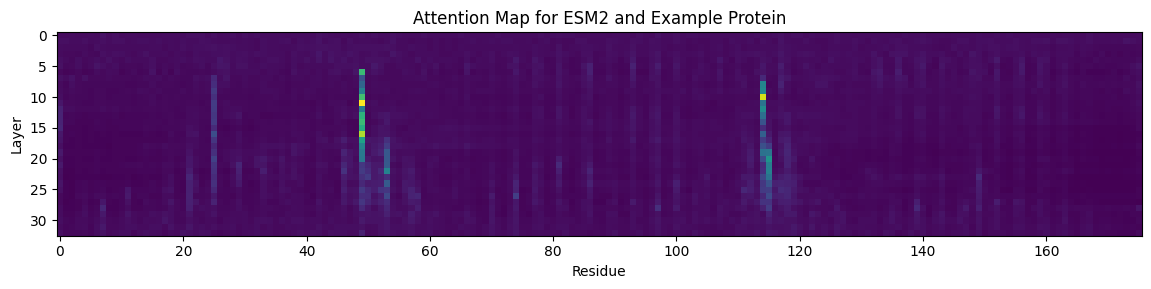

In [13]:
plt.figure(figsize=(14, 9))
plt.xlabel('Residue')
plt.ylabel('Layer')
plt.title('Attention Map for ESM2 and Example Protein')
plt.imshow(attention_map, cmap='viridis', interpolation='nearest')
plt.show()